# BBC text dataset

In [1]:
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
print(tf.__version__)

2.1.0


In [3]:
# import the dataset

# df = pd.read_csv('../BBC-text/bbc-text.csv',skiprows=1,header=None)
# header will only exclude the header part and inclue the headers in the data...so use skip rows for skipping that 1st Row
df = pd.read_csv('../BBC-text/bbc-text.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [5]:
df.shape

(2225, 2)

In [6]:
df = pd.read_csv('../BBC-text/bbc-text.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [7]:
text  = df['text'].tolist()
category = df['category'].tolist()

In [8]:
len(text),len(category) # now both are converted into list!

(2225, 2225)

In [11]:
text[0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [12]:
sentences = []
labels = category

stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]


for i in range(len(text)):
    
    for word in stopwords:        
        tmp = ' '+word+' '
        text[i] = text[i].replace(tmp," ")
        text[i] = text[i].replace('  ',' ')
         
    sentences.append(text[i])
    
labels = category

print(sentences[0])
print(len(sentences))



tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable satelli

In [13]:
len(labels)

2225

So now we prepared our sentences and labels !!

In [14]:
train_size = int(len(sentences) * 0.8)

train_sentences = sentences[0:train_size]
train_labels = labels[0:train_size]

test_sentences = sentences[train_size:]
test_labels = labels[train_size:]



In [15]:
train_size

1780

In [16]:
len(test_sentences) , len(test_labels),len(train_sentences)

(445, 445, 1780)

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
# setting the hyper parameters at one place
vocab_size = 10000
embedding_dim = 16
max_len = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

In [19]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok) # creating object of Tokenizer
tokenizer.fit_on_texts(train_sentences) # fitting on the text train data
train_sequences = tokenizer.texts_to_sequences(train_sentences) # converting into sequence of tokens
train_padded = pad_sequences(train_sequences,maxlen=max_len,truncating=trunc_type) # padding the sequences of equal length


# Now for the test data
test_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(test_sequences,maxlen=max_len,truncating=trunc_type)


# Sanity check
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[20]))
print(len(train_padded[20]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

449
120
123
120
192
120


Tokenizing the labels ...since our labels are currently in texts....

In [20]:
label_tokenizer = Tokenizer() # creating object of Tokenizer
label_tokenizer.fit_on_texts(labels) # fitting on the labels

# converting categorical data into numerical data
train_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
test_label_seq = np.array(label_tokenizer.texts_to_sequences(test_labels))


In [21]:
train_label_seq

array([[4],
       [2],
       [1],
       ...,
       [1],
       [2],
       [5]])

In [22]:
label_tokenizer.word_index # so our labels have been encoded in this manner.

{'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}

In [23]:
# sanity check

labels[0:5]

['tech', 'business', 'sport', 'sport', 'entertainment']

In [24]:
train_label_seq[0:5]

array([[4],
       [2],
       [1],
       [1],
       [5]])

In [25]:
# Now creating the Model architectre! 

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(6,activation='softmax')
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 160,558
Trainable params: 160,558
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
hist = model.fit(train_padded,train_label_seq,epochs=20,validation_data=(testing_padded,test_label_seq))

Train on 1780 samples, validate on 445 samples
Epoch 1/20
1780/1780 [==============================] - 7s 4ms/sample - loss: 1.7574 - accuracy: 0.3444 - val_loss: 1.7064 - val_accuracy: 0.2652
Epoch 2/20
1780/1780 [==============================] - 1s 768us/sample - loss: 1.6239 - accuracy: 0.3124 - val_loss: 1.5315 - val_accuracy: 0.3955
Epoch 3/20
1780/1780 [==============================] - ETA: 0s - loss: 1.3905 - accuracy: 0.5483 ETA: 0s - loss: 1 - 1s 697us/sample - loss: 1.3889 - accuracy: 0.5494 - val_loss: 1.2766 - val_accuracy: 0.6202
Epoch 4/20
1780/1780 [==============================] - 1s 711us/sample - loss: 1.0924 - accuracy: 0.7427 - val_loss: 0.9983 - val_accuracy: 0.7888
Epoch 5/20
1780/1780 [==============================] - 1s 731us/sample - loss: 0.7952 - accuracy: 0.9146 - val_loss: 0.7488 - val_accuracy: 0.8831
Epoch 6/20
1780/1780 [==============================] - 1s 637us/sample - loss: 0.5452 - accuracy: 0.9640 - val_loss: 0.5571 - val_accuracy: 0.9213
Epoch

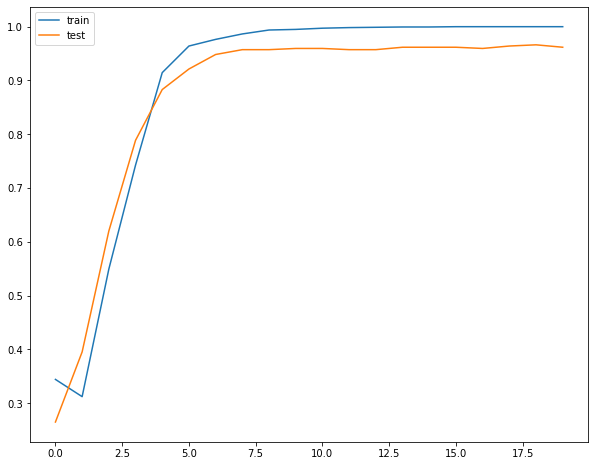

In [29]:
plt.figure(figsize=(10,8))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['train','test'])

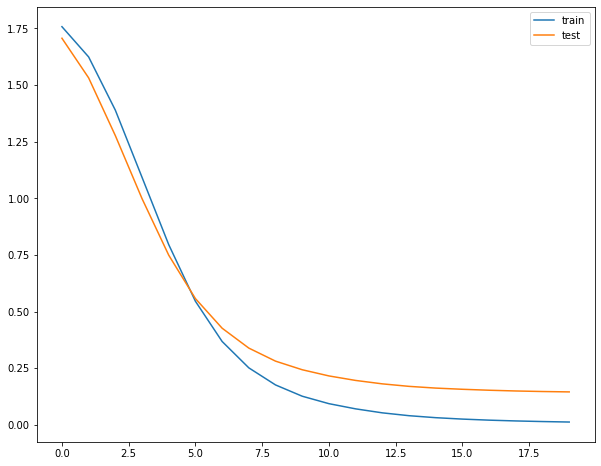

In [30]:
plt.figure(figsize=(10,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train','test'])